# 图像变换：平移，水平/垂直翻转，旋转

200 200


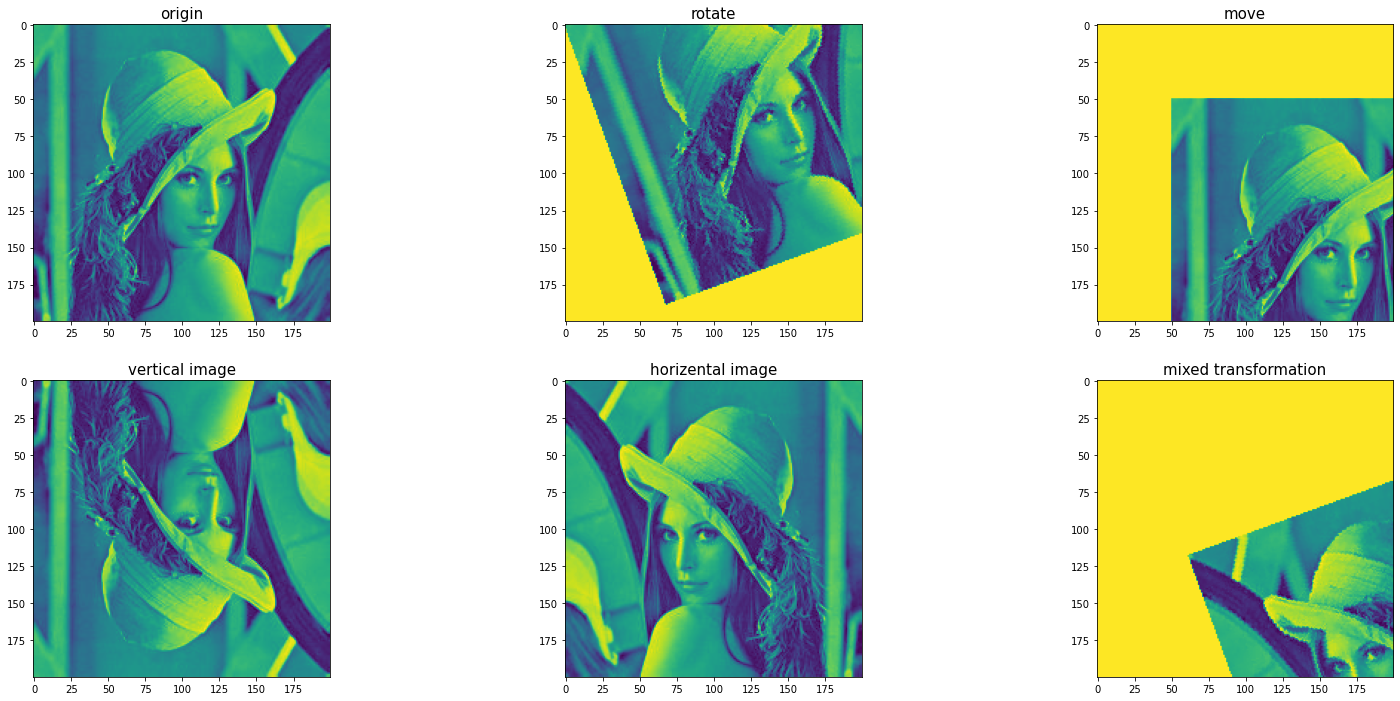

In [23]:
import cv2
import math
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

class Img:
    def __init__(self, image, rows, cols, center=[0, 0]):
        self.src = image  # 原始图像
        self.rows = rows  # 原始图像的行
        self.cols = cols  # 原始图像的列
        self.center = center  # 旋转中心，默认是[0,0]

    def Move(self, delta_x, delta_y):  # 平移
        # delta_x>0左移，delta_x<0右移
        # delta_y>0上移，delta_y<0下移
        self.transform = np.array(
            [[1, 0, delta_x], [0, 1, delta_y], [0, 0, 1]])

    def Zoom(self, factor):  # 缩放
        # factor>1表示缩小；factor<1表示放大
        self.transform = np.array([[factor, 0, 0], [0, factor, 0], [0, 0, 1]])

    def Horizontal(self):  # 水平镜像
        self.transform = np.array([[1, 0, 0], [0, -1, self.cols-1], [0, 0, 1]])

    def Vertically(self):  # 垂直镜像
        self.transform = np.array([[-1, 0, self.rows-1], [0, 1, 0], [0, 0, 1]])

    def Rotate(self, beta):  # 旋转
        # beta>0表示逆时针旋转；beta<0表示顺时针旋转
        self.transform = np.array([[math.cos(beta), -math.sin(beta), 0],
                                   [math.sin(beta), math.cos(beta), 0],
                                   [0,              0,         1]])

    def Process(self):
        self.dst = np.zeros((self.rows, self.cols), dtype=np.uint8)
        for i in range(self.rows):
            for j in range(self.cols):
                src_pos = np.array([i-self.center[0], j-self.center[1], 1])
                [x, y, z] = np.dot(self.transform, src_pos)
                x = int(x)+self.center[0]
                y = int(y)+self.center[1]

                if x >= self.rows or y >= self.cols or x < 0 or y < 0:
                    self.dst[i][j] = 255
                else:
                    self.dst[i][j] = self.src[x][y]


if __name__ == '__main__':
    src = Image.open('img/lena.jpg').convert('L')
    src = np.array(src, dtype=np.float32)
    rows = src.shape[0]
    cols = src.shape[1]
    print(rows, cols)

    img = Img(src, rows, cols, [0, 0])
    fig = plt.figure(figsize=(27, 12))
    plt.subplot(231)
    plt.title('origin', fontsize=15)
    plt.imshow(src)
    plt.subplot(232)
    img.Rotate(-math.radians(20))  # 旋转
    img.Process()
    plt.title('rotate', fontsize=15)
    plt.imshow(img.dst)
    plt.subplot(233)
    img.Move(-50, -50)  # 平移
    img.Process()
    plt.title('move', fontsize=15)
    plt.imshow(img.dst)
    plt.subplot(234)
    img.Vertically()  # 镜像
    img.Process()
    plt.title('vertical image', fontsize=15)
    plt.imshow(img.dst)
    img.Horizontal()  # 镜像
    img.Process()
    plt.subplot(235)
    plt.title('horizental image', fontsize=15)
    plt.imshow(img.dst)
    # 混合变换
    img_src = Img(src, src.shape[0], src.shape[1], center = [0,0])
    img_src.Rotate(+math.radians(20))
    img_src.Process()
    img_rotate = img_src.dst
    img_rotate = Img(img_rotate, img_rotate.shape[0], img_rotate.shape[1], center = [0,0])
    img_rotate.Horizontal()
    img_rotate.Process()
    img_horizental_image = img_rotate.dst
    img_horizental_image = Img(img_horizental_image, img_horizental_image.shape[0], img_horizental_image.shape[1], center = [0,0])
    img_horizental_image.Move(-50, -50)
    img_horizental_image.Process()
    img_move = img_horizental_image.dst
    
    img.Horizontal()  # 镜像
    img.Process()
    plt.subplot(236)
    plt.title('mixed transformation', fontsize=15)
    plt.imshow(img_move)

    plt.show()
